$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

$\color{yellow}{\text{Zadanie 1}}$

In [2]:
def f(x):
    return 4 / (1 + x**2)

Tworzę funkcje całkujące $f(x)$ w przedziale [0, 1].

In [3]:
def trapezoidal(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    y_values = f(x_values)
    return integrate.trapz(y_values, x_values)

def simpson(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    y_values = f(x_values)
    return integrate.simps(y_values, x_values)

def midpoint(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    mid_x_values = (x_values[1:] + x_values[:-1]) / 2
    y_values = f(mid_x_values)
    h = x_values[1] - x_values[0]
    return np.sum(y_values * h)

```Podpunkt a```

In [4]:
trapezoidal_error = []
simpson_error = []
midpoint_error = []
eval_values = []

real_value = np.pi  # Prawdziwa wartosc calki

# Zakres m od 1 do 25
ms = range(1, 26)
for m in ms:
    eval_count = 2 ** m + 1  # Liczba ewaluacji funkcji
    eval_values.append(eval_count)

    # Obliczanie bledu dla kazdej metody
    trap_error = abs((real_value - trapezoidal(m, f)) / real_value)
    simp_error = abs((real_value - simpson(m, f)) / real_value)
    mid_error = abs((real_value - midpoint(m, f)) / real_value)

    trapezoidal_error.append(trap_error)
    simpson_error.append(simp_error)
    midpoint_error.append(mid_error)

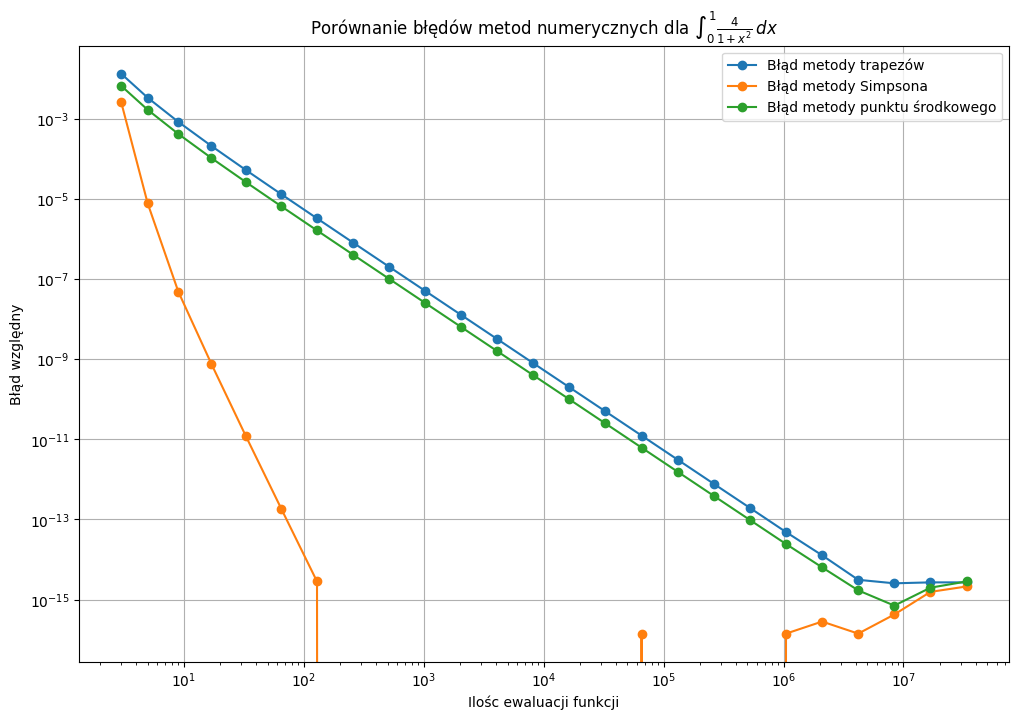

In [19]:
plt.figure(figsize=(12, 8))
plt.loglog(eval_values, trapezoidal_error, label='Błąd metody trapezów', marker = 'o')
plt.loglog(eval_values, simpson_error, label='Błąd metody Simpsona', marker = 'o')
plt.loglog(eval_values, midpoint_error, label='Błąd metody punktu środkowego', marker = 'o')
plt.xlabel('Ilośc ewaluacji funkcji')
plt.ylabel('Błąd względny')
plt.title(r'Porównanie błędów metod numerycznych dla $\int_{0}^{1} \frac{4}{1 + x^2} \, dx$')
plt.legend()
plt.grid(True)
plt.show()

```Podpunkt b```

In [6]:
trap_h_min, simp_h_min, mid_h_min = None, None, None
lowest_trap_error, lowest_simp_error, lowest_mid_error = float('inf'), float('inf'), float('inf')
m_trap, m_simp, m_mid = None, None, None

for m in ms:
    h = 1 / (2 ** m)
    trap_error = abs((real_value - trapezoidal(m, f)) / real_value)
    simp_error = abs((real_value - simpson(m, f)) / real_value)
    mid_error = abs((real_value - midpoint(m, f)) / real_value)

    if trap_error < lowest_trap_error:
        lowest_trap_error = trap_error
        trap_h_min = h
        m_trap = m
        
    if simp_error < lowest_simp_error:
        lowest_simp_error = simp_error
        simp_h_min = h
        m_simp = m

    if mid_error < lowest_mid_error:
        lowest_mid_error = mid_error
        mid_h_min = h
        m_mid = m

In [30]:
print(f'Najmniejszy blad metody trapezow dla h = {trap_h_min:.3e}. Odpowiada to m = {m_trap}.')
print(f'Najmniejszy blad metody Simpsona dla h = {simp_h_min:.3e}. Odpowiada to m = {m_simp}.')
print(f'Najmniejszy blad metody punktu srodkowego dla h = {mid_h_min:.3e}. Odpowiada to m = {m_mid}.')

Najmniejszy blad metody trapezow dla h = 1.192e-07. Odpowiada to m = 23.
Najmniejszy blad metody Simpsona dla h = 3.906e-03. Odpowiada to m = 8.
Najmniejszy blad metody punktu srodkowego dla h = 1.192e-07. Odpowiada to m = 23.


$h_{min}$ dla metody roznic progresywnych z laboratorium 1. wyniosla 9.124e-09

$h_{min}$ dla metody roznic centralnych z laboratorium 1. wyniosla 2.273e-06

```Podpunkt c```

In [8]:
hs = [1 / (2**m) for m in ms[:7]]

def calculate_order_of_convergence(errors):
    orders = []
    for i in range(1, len(errors)):
        p = np.log(errors[i] / errors[i - 1]) / np.log(hs[i] / hs[i - 1])
        orders.append(p)
    return np.mean(orders)

trap_orders = calculate_order_of_convergence(trapezoidal_error[:7])
simp_orders = calculate_order_of_convergence(simpson_error[:7])
mid_orders = calculate_order_of_convergence(midpoint_error[:7])

In [31]:
print(f'Rzad zbieznosci metody punktow srodkowych: {mid_orders:.5}')
print(f'Rzad zbieznosci metody trapezow: {trap_orders:.5}')
print(f'RRzad zbieznosci metody Simpsona: {simp_orders:.5}')

Rzad zbieznosci metody punktow srodkowych: 1.9992
Rzad zbieznosci metody trapezow: 1.9996
RRzad zbieznosci metody Simpsona: 6.6264


$\color{yellow}{\text{Zadanie 2}}$

In [15]:
def gauss_legendre(f, n, a = 0, b = 1):
    nodes, weights = roots_legendre(n)

    # Transformacja przedziału z (-1, 1) na (a, b)
    transformed_nodes = 0.5 * (nodes + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights

    return np.sum(transformed_weights * f(transformed_nodes))

In [29]:
gauss_errors = []
evaluations_gauss = []
for n in range(1, 31):
    integral_value = gauss_legendre(f, n)
    relative_error = abs((real_value - integral_value) / real_value)
    gauss_errors.append(relative_error)
    evaluations_gauss.append(n + 1)

print(evaluations_gauss.index(gauss_errors.index(min(gauss_errors))) + 1)

24


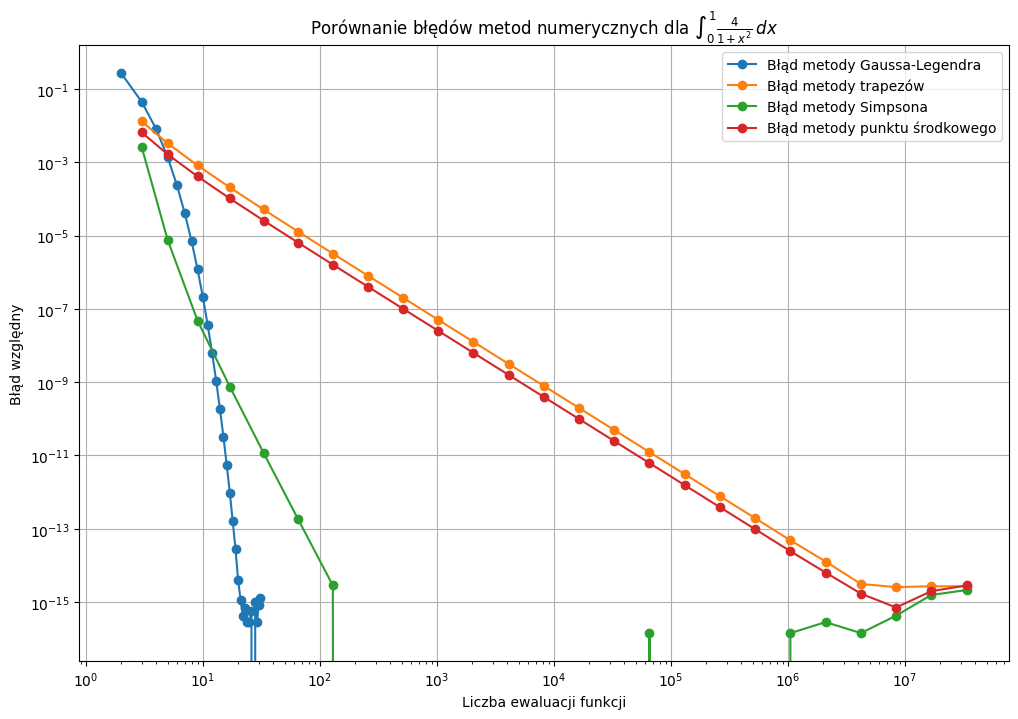

In [28]:
plt.figure(figsize=(12, 8))

# Wykres dla metody Gaussa-Legendre’a
plt.loglog(evaluations_gauss, gauss_errors, label='Błąd metody Gaussa-Legendra', marker='o')
# Dodajemy wykresy dla metod z podpunktu (a)
plt.loglog(eval_values, trapezoidal_error, label='Błąd metody trapezów', marker='o')
plt.loglog(eval_values, simpson_error, label='Błąd metody Simpsona', marker='o')
plt.loglog(eval_values, midpoint_error, label='Błąd metody punktu środkowego', marker='o')

plt.xlabel('Liczba ewaluacji funkcji')
plt.ylabel('Błąd względny')
plt.title(r'Porównanie błędów metod numerycznych dla $\int_{0}^{1} \frac{4}{1 + x^2} \, dx$')
plt.legend()
plt.grid(True)
plt.show()